In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from powershap import PowerShap
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
import pickle

# 產生模擬用資料

$$Y = 2+3X_1+2X_2+e$$
where $e \sim N(0,1)$

In [5]:
np.random.seed(42)
num_rows = 1000

column_data = {}

for i in range(1, 11):
    column_name = f'x{i}'
    column_data[column_name] = np.random.rand(num_rows)

df = pd.DataFrame(column_data)


df['Y'] = 2 + 3 * df['x1'] + 2 * df['x2'] + np.random.normal(0, 1, num_rows)


# 畫熱圖 和散佈圖

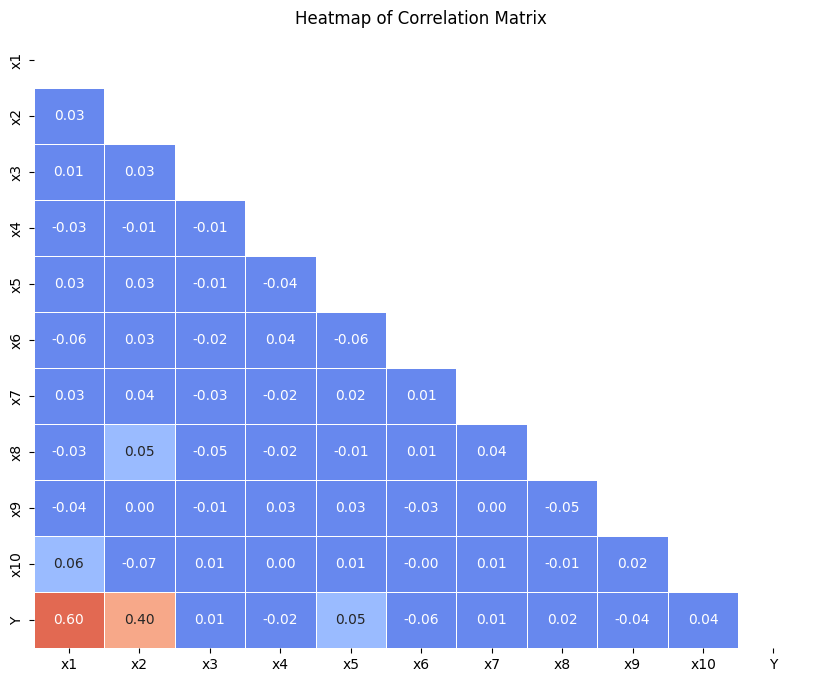

In [6]:

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom colormap
cmap = ListedColormap(sns.color_palette("coolwarm").as_hex())

# Create a heatmap using seaborn with annotations only in the lower triangle
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=corr_matrix, mask=mask, cmap=cmap, fmt=".2f", linewidths=.5, cbar=False)
plt.title('Heatmap of Correlation Matrix')
plt.savefig("heatmap.png", transparent=True)
plt.show()

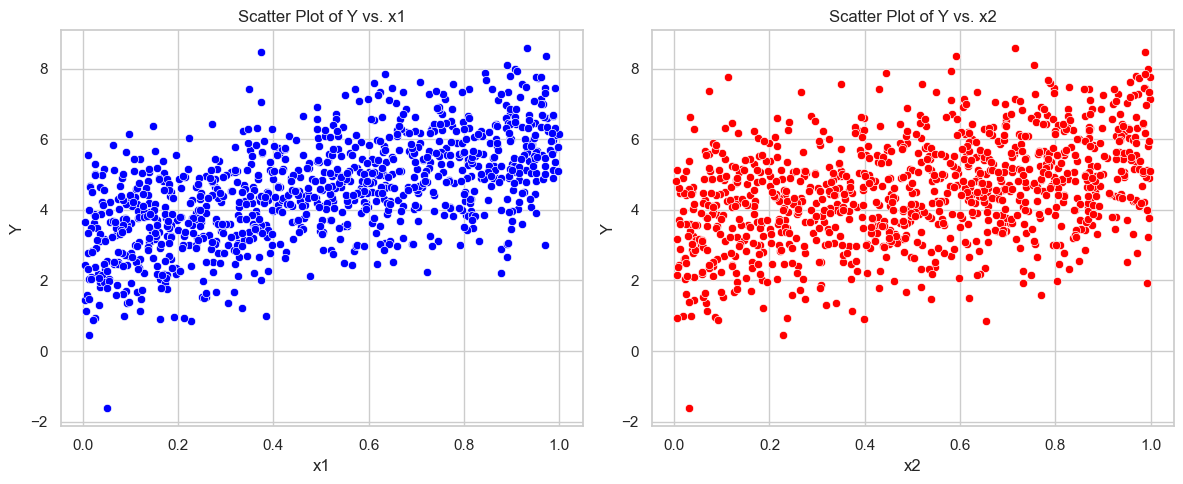

In [7]:
sns.set(style="whitegrid")

# Scatter plot for Y vs. x1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='x1', y='Y', data=df, color='blue')
plt.title('Scatter Plot of Y vs. x1')
plt.xlabel('x1')
plt.ylabel('Y')

# Scatter plot for Y vs. x2
plt.subplot(1, 2, 2)
sns.scatterplot(x='x2', y='Y', data=df, color='red')
plt.title('Scatter Plot of Y vs. x2')
plt.xlabel('x2')
plt.ylabel('Y')

plt.tight_layout()
plt.savefig("scatter.png", transparent=True)
plt.show()


# 使用powershap 篩選變量


In [8]:
selector = PowerShap(
    model=CatBoostRegressor(n_estimators=250, verbose=0, use_best_model=True)
)

selector.fit(df.iloc[:,:-1].values, df.iloc[:,-1].values)  # Fit the PowerShap feature selector
result = selector.transform(df.iloc[:,:-1])  # Reduce the dataset to the selected features



100%|██████████| 10/10 [00:02<00:00,  3.77it/s]
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
100%|██████████| 7/7 [00:01<00:00,  3.90it/s]
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
X has feature names, but PowerShap was fitted without feature names


# 可以看出是第一個變量和第二個變量被留下

In [9]:
selector.get_feature_names_out()

array(['x0', 'x1'], dtype=object)

In [10]:
result #這裡留下了X1和X2

array([[0.37454012, 0.18513293],
       [0.95071431, 0.54190095],
       [0.73199394, 0.87294584],
       ...,
       [0.13681863, 0.06895802],
       [0.95023735, 0.05705472],
       [0.44600577, 0.28218707]])

In [ ]:
＃ 模擬資料使用linearregression

In [13]:
selector = PowerShap(
    model=LinearRegression()
)
selector.fit(df.iloc[:,:-1], df.iloc[:,-1])  # Fit the PowerShap feature selector
result = selector.transform(df.iloc[:,:-1])  # Reduce the dataset to the selected features
selector.get_feature_names_out()

100%|██████████| 10/10 [00:00<00:00, 366.77it/s]
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
100%|██████████| 6/6 [00:00<00:00, 558.31it/s]
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf


array(['x1', 'x2', 'x6'], dtype=object)

# 使用我們的資料去測試

In [14]:
path = "/Users/iofting/Library/Mobile Documents/com~apple~CloudDocs/20230726 YENTING Ten Che Che Jhe Black-Litterman/20231017_BTC/data/"
import os
os.chdir(path)
os.getcwd()

'/Users/iofting/Library/Mobile Documents/com~apple~CloudDocs/20230726 YENTING Ten Che Che Jhe Black-Litterman/20231017_BTC/data'

In [15]:
with open('processing_data1129.pkl', 'rb') as file:
    x_data = pickle.load(file)
x_data

,MACD,RSI,CCI,ADX,DowJones,VIX,USEUI,Nasdaq,DJIAV,CPI,...,Money Supply,GDP,Inflation Rate,Federal Funds Effective Rate,Gold price,Oil price,US dollar Index,EUR/USD,GBP/USD,CNY/USD
0,,,,,,,,,,,,,,,,,,,,,
2014-07-31,-2.564757,54.424918,0.002900,53.019095,16563.300000,16.950001,87.58,4369.770020,15.740000,100.5202,...,11429.9,17743.227,2.0,0.08,1281.300049,106.020000,81.460000,1.338900,1.688600,0.162000
2014-08-01,-2.834362,56.090050,0.004003,57.656960,16493.370000,17.030001,53.10,4352.640137,16.110000,100.3523,...,11458.9,17743.227,1.7,0.09,1293.599976,104.840000,81.300000,1.343000,1.682000,0.161800
2014-08-02,-2.616765,55.893853,0.005458,61.487927,16518.673333,16.393334,92.27,4363.056804,15.566667,100.3523,...,11458.9,17743.227,1.7,0.09,1291.633301,105.030000,81.306667,1.342733,1.683433,0.161833
2014-08-03,-2.540888,56.164574,0.004942,64.123317,16543.976667,15.756667,91.65,4373.473470,15.023333,100.3523,...,11458.9,17743.227,1.7,0.09,1289.666626,105.220000,81.313333,1.342467,1.684867,0.161867
2014-08-04,-2.468177,56.434357,0.004232,67.214528,16569.280000,15.120000,131.99,4383.890137,14.480000,100.3523,...,11458.9,17743.227,1.7,0.09,1287.699951,105.410000,81.320000,1.342200,1.686300,0.161900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-23,-7.613094,61.292772,0.010673,21.611839,33853.253333,16.849999,127.64,12048.953453,16.380000,127.9921,...,20712.1,26798.605,4.9,4.83,1985.899984,82.246667,101.506667,1.102300,1.246467,0.145000
2023-04-24,-26.885746,61.803555,0.010427,23.717347,33875.400000,16.889999,149.57,12037.200200,15.910000,127.9921,...,20712.1,26798.605,4.9,4.83,1989.099976,82.540000,101.350000,1.104100,1.248200,0.145000
2023-04-25,-43.752400,61.731829,0.010010,27.336726,33530.830000,18.760000,111.25,11799.160160,16.860000,127.9921,...,20712.1,26798.605,4.9,4.83,1994.000000,80.600000,101.860000,1.097200,1.240800,0.144200


In [16]:
df =  pd.read_csv("比特幣歷史數據.csv",parse_dates=["日期"]).iloc[::-1].reset_index(drop=True)
df["收市"] = df["收市"].str.replace(',', '').astype(float)
df["高"] = df["高"].str.replace(',', '').astype(float)
df["低"]= df["低"].str.replace(',', '').astype(float)
df=df[["日期","收市"]]
df.columns = ["Date","close"]

df = df[df['Date'] >= '2014-07-31']
df = df.reset_index(drop=True)

h = 1 
df_return = np.log(df.loc[:, df.columns!='Date'] 
                        /df.loc[:, df.columns!='Date'].shift(1))[h:]
df_return

,close
1,0.015653
2,-0.011928
3,-0.004743
4,0.006601
5,-0.006771
...,...
3188,-0.008032
3189,-0.002980
3190,0.028295
3191,0.004436


In [17]:
selector = PowerShap(
    model=CatBoostRegressor(n_estimators=250, verbose=0, use_best_model=True)
)

selector.fit(x_data.iloc[:-h], df_return)  # Fit the PowerShap feature selector
result = selector.transform(x_data)  # Reduce the dataset to the selected features
selector.get_feature_names_out()


100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
No features were selected: either the data is too noisy or the selection test too strict.


array([], dtype=object)

# 再預設的條件下，沒有特徵被選取

In [ ]:
# 使用linear regression 用我們的資料

In [18]:
selector = PowerShap(
    model=LinearRegression()
)
selector.fit(x_data.iloc[:-h], df_return)  # Fit the PowerShap feature selector
result = selector.transform(x_data)  # Reduce the dataset to the selected features
selector.get_feature_names_out()

100%|██████████| 10/10 [00:00<00:00, 156.83it/s]
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
invalid value encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
invalid value encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
overflow encountered in _nct_cdf
divide by zero encountered in _nct_cdf
100%|██████

array(['DowJones', 'USEUI', 'DJIAV', 'CPI', 'PPI', 'Money Supply', 'GDP',
       'Inflation Rate', 'Federal Funds Effective Rate', 'Gold price',
       'GBP/USD', 'CNY/USD'], dtype=object)